In [1]:
## What does the initialization look like?

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2022-12-08 16:52:02.831341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


32/32 [==============================] - 0s 976us/step


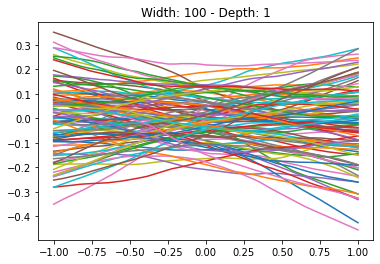

32/32 [==============================] - 0s 862us/step


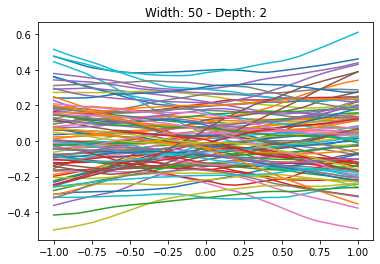

32/32 [==============================] - 0s 886us/step


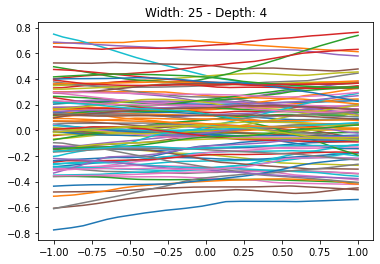

In [2]:
width_depth = [
    (100,1),(50,2),(25,4)
]

reps = 100

for width, depth in width_depth:

    for rep in range(reps):

        hidden_layer_width=width
        num_hidden_layers=depth

        ## Input Layer
        layers = [
            tf.keras.layers.Dense(
                hidden_layer_width,
                activation=tf.nn.relu,
                input_shape=(1,),
                kernel_initializer=tf.keras.initializers.GlorotUniform(),
                bias_initializer=tf.keras.initializers.GlorotUniform()
            )
        ]

        ## Hidden Layers
        for i in range(num_hidden_layers-1):
            layers.append(
                tf.keras.layers.Dense(hidden_layer_width,
                    activation=tf.nn.relu,
                    kernel_initializer=tf.keras.initializers.GlorotUniform(),
                    bias_initializer=tf.keras.initializers.GlorotUniform())
            )

        ## Output Layer
        layers.append(tf.keras.layers.Dense(1))

        model = tf.keras.Sequential(layers)
        
        model.compile(
            loss=tf.keras.losses.MeanSquaredError(),
            #loss=tf.keras.losses.KLDivergence(),
            metrics=[tf.keras.metrics.MeanSquaredError()],
            optimizer=tf.keras.optimizers.Adam(0.001)
        )

        x = np.linspace(-1,1,1000)
        y = model.predict(x)

        plt.plot(x,y)

    plt.title(f"Width: {hidden_layer_width} - Depth: {num_hidden_layers}")
    plt.show()
